In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing the data
df = pd.read_csv('gym.csv')

In [4]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [5]:
df.shape

(62184, 11)

In [6]:
#checking rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [7]:
#looking if there is any missing data
df.isnull().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

In [8]:
df = df.drop('date',axis=1)

In [9]:
# converting the temperature column into integer
df['temperature'] = np.round(df['temperature'])
df['temperature'] = df['temperature'].astype('int64')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   number_people         62184 non-null  int64
 1   timestamp             62184 non-null  int64
 2   day_of_week           62184 non-null  int64
 3   is_weekend            62184 non-null  int64
 4   is_holiday            62184 non-null  int64
 5   temperature           62184 non-null  int64
 6   is_start_of_semester  62184 non-null  int64
 7   is_during_semester    62184 non-null  int64
 8   month                 62184 non-null  int64
 9   hour                  62184 non-null  int64
dtypes: int64(10)
memory usage: 4.7 MB


In [11]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.555127,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.325271,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.000000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.000000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.000000,1.000000,1.000000,12.000000,23.000000


In [12]:
df.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.372669,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.185047,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.012665,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.021774,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.087967,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.372669,0.185047,0.012665,0.021774,-0.087967,1.000000,0.093864,0.152728,0.063510,0.185324
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093864,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152728,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063510,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185324,0.010091,0.045581,-0.023624,1.000000


## Visualization

<AxesSubplot:>

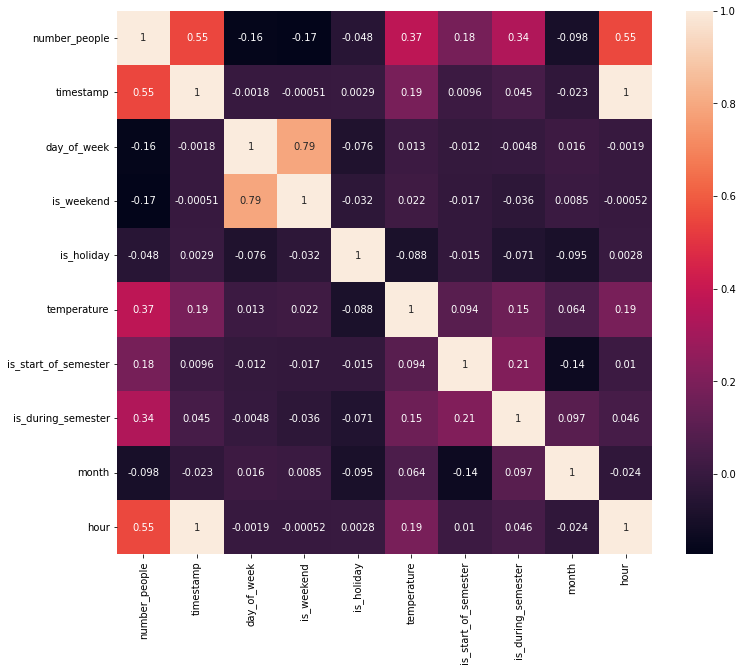

In [13]:
fig, ax = plt.subplots(figsize=(12,10))    
sns.heatmap(df.corr(),annot=True)

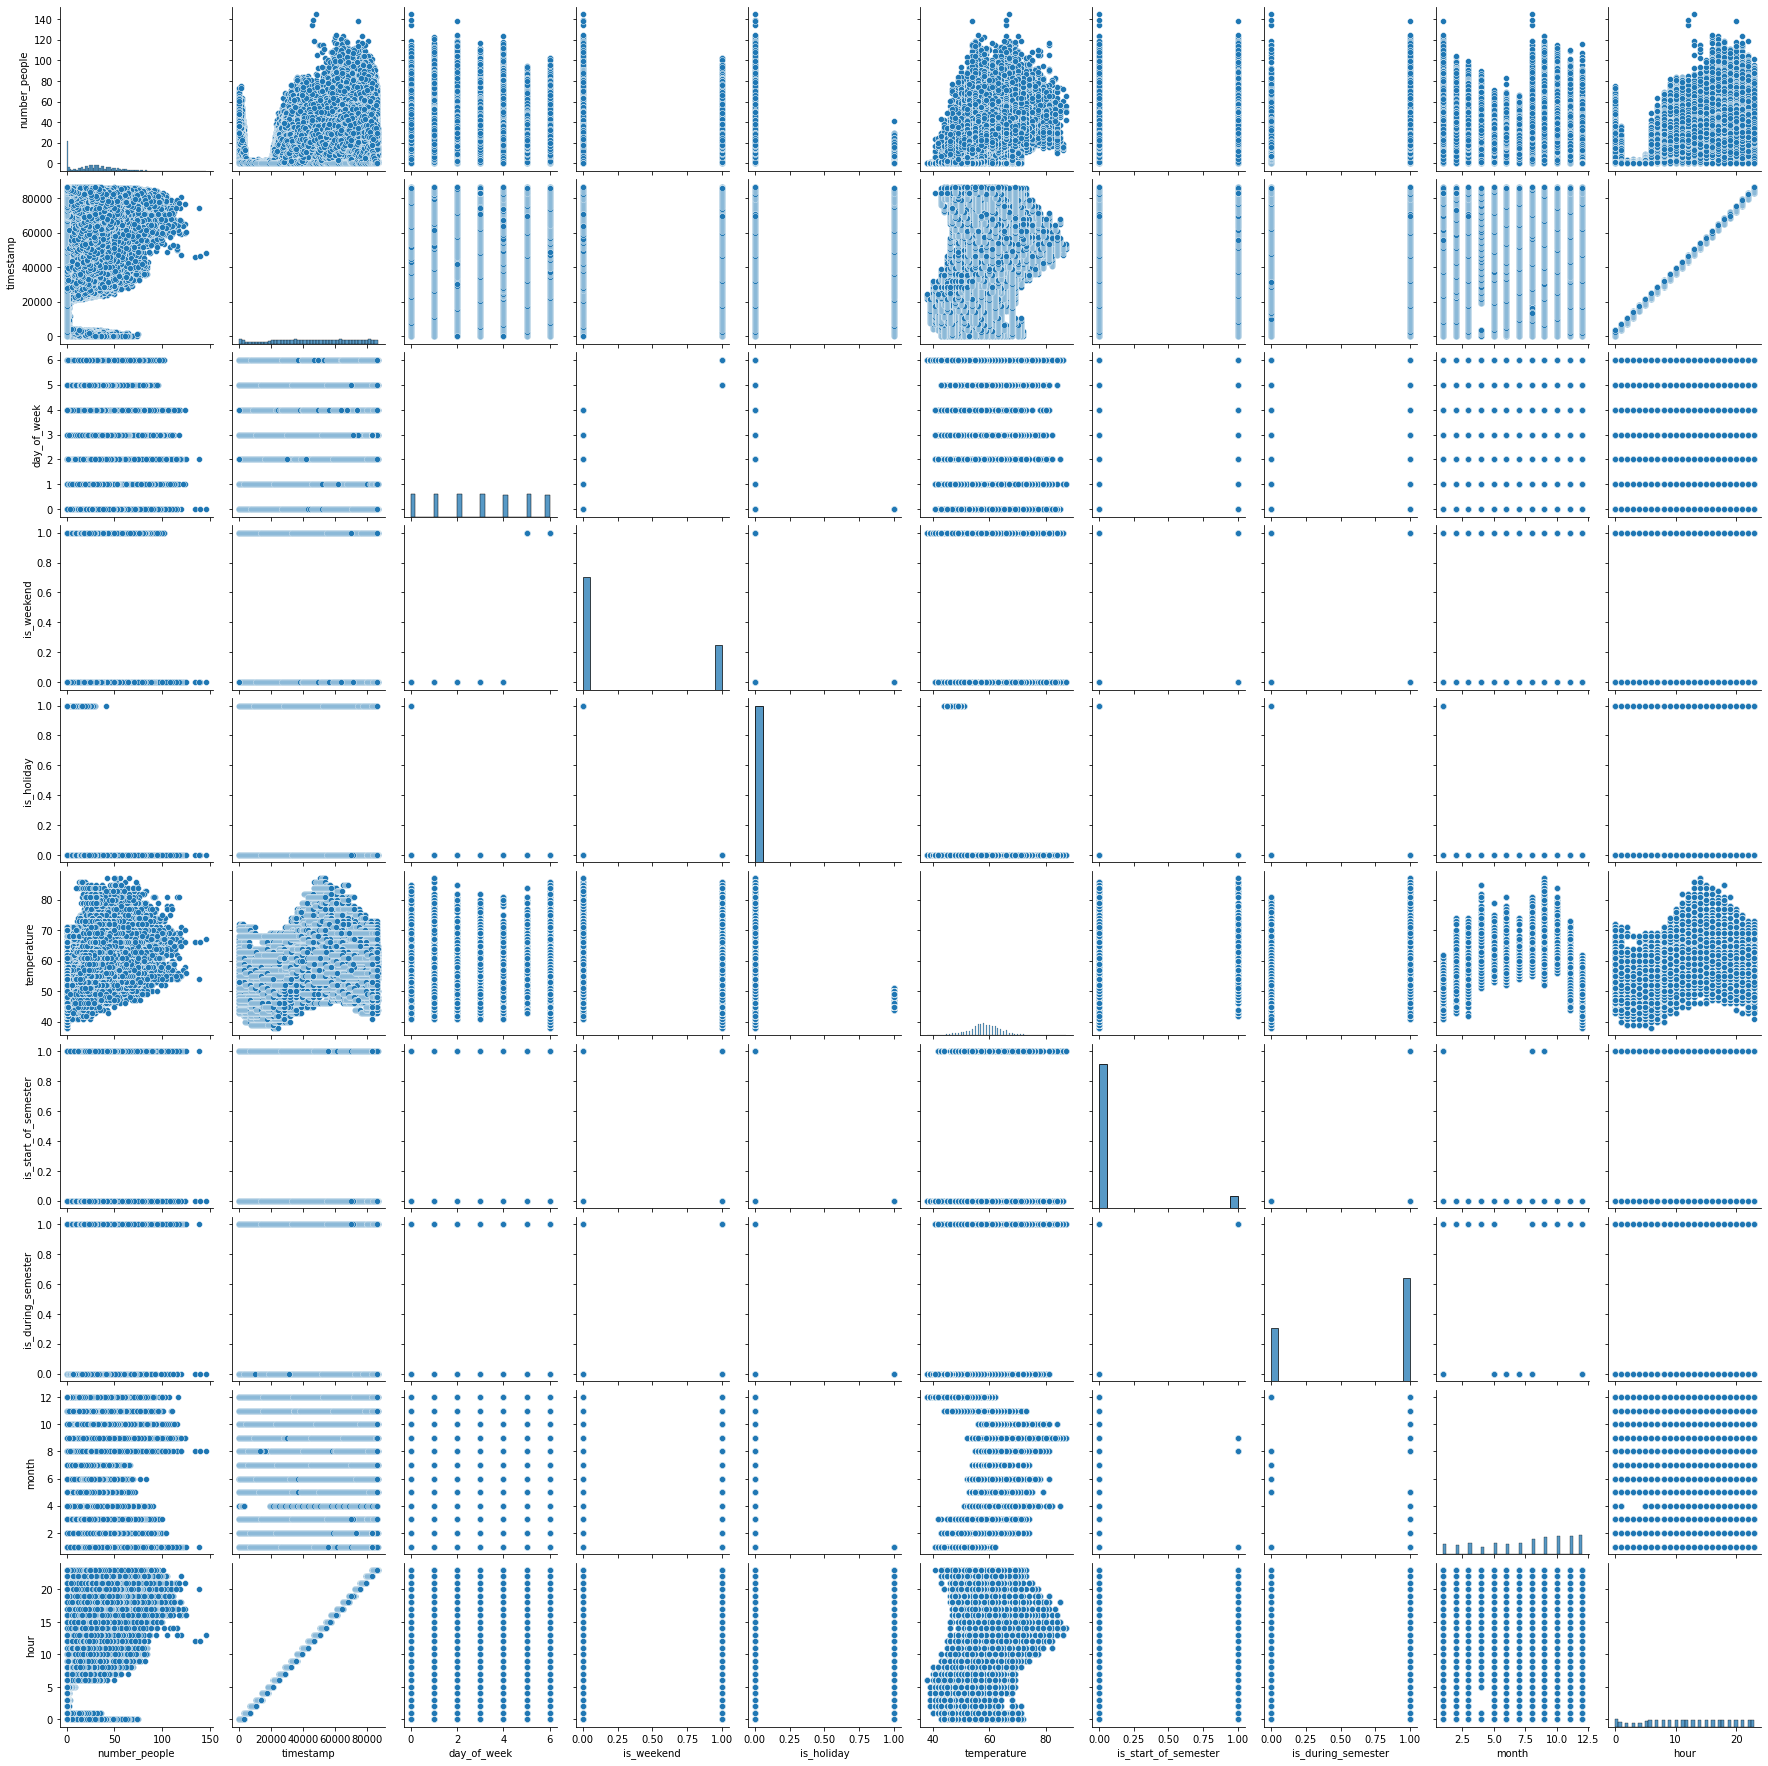

In [14]:
sns.pairplot(df)

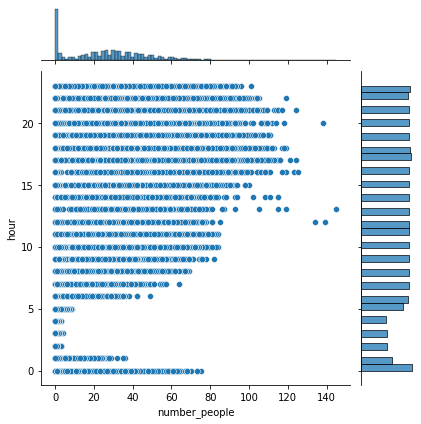

In [15]:
sns.jointplot(x=df['number_people'], y=df['hour'])

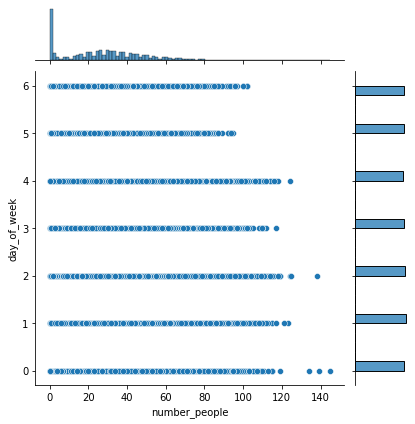

In [16]:
sns.jointplot(x=df['number_people'], y=df['day_of_week'])

<AxesSubplot:xlabel='is_holiday', ylabel='number_people'>

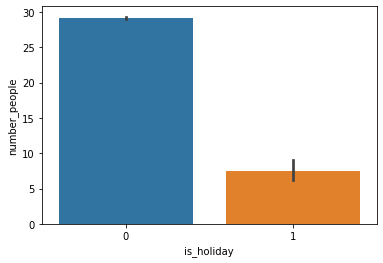

In [17]:
sns.barplot(x=df['is_holiday'], y=df['number_people'])

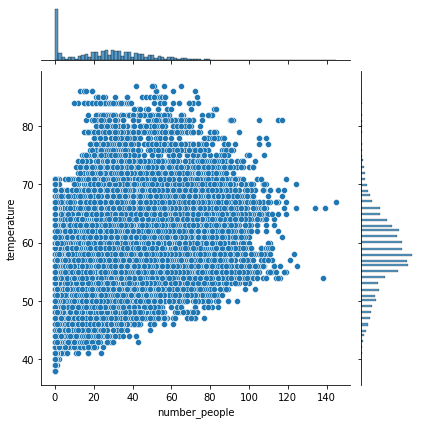

In [18]:
sns.jointplot(x=df['number_people'], y=df['temperature'])

<AxesSubplot:xlabel='day_of_week', ylabel='number_people'>

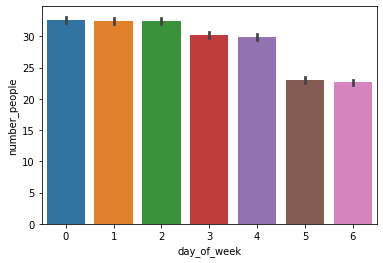

In [19]:
sns.barplot(x=df['day_of_week'], y=df['number_people'])

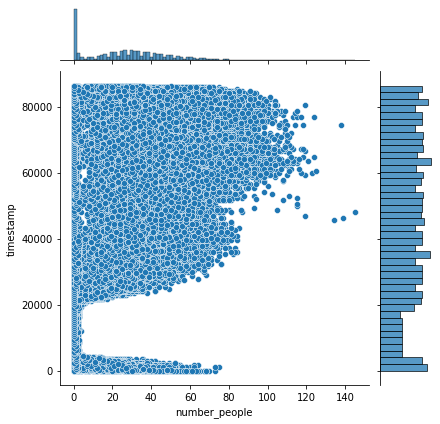

In [20]:
sns.jointplot(x=df['number_people'], y=df['timestamp'])

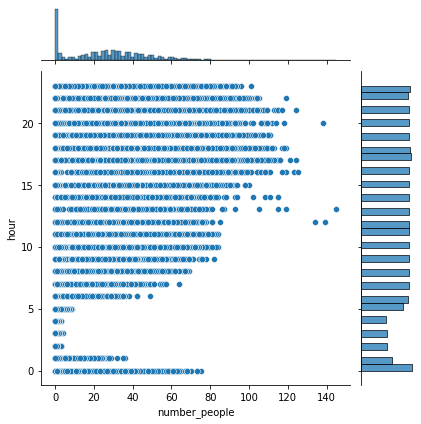

In [21]:
sns.jointplot(x=df['number_people'], y=df['hour'])

<AxesSubplot:xlabel='is_start_of_semester', ylabel='number_people'>

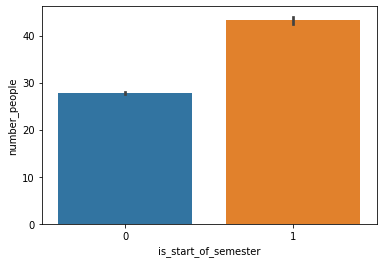

In [22]:
sns.barplot(x=df['is_start_of_semester'], y=df['number_people'])

In [23]:
df['is_start_of_semester'].value_counts()

0    57282
1     4902
Name: is_start_of_semester, dtype: int64

In [24]:
df['is_during_semester'].value_counts()

1    41055
0    21129
Name: is_during_semester, dtype: int64

<AxesSubplot:xlabel='is_during_semester', ylabel='number_people'>

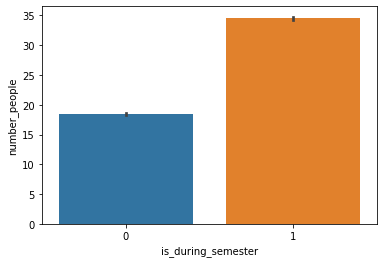

In [25]:
sns.barplot(x=df['is_during_semester'], y=df['number_people'])

In [26]:
x = df.drop('number_people', axis=1)
y = df['number_people']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [28]:
# used to resize the distribution of values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Implementing different algorithm 

In [29]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train,Y_train)
print(linreg.score(X_test,Y_test))

0.5032818096622269


In [30]:
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor(n_neighbors=5).fit(X_train,Y_train)
print(knnreg.predict(X_test))
print('R-squared test score:{:.3f}'.format(knnreg.score(X_test,Y_test)))

[ 0.  43.4  0.2 ... 25.  25.2 37.8]
R-squared test score:0.858


In [37]:
from sklearn.ensemble import RandomForestRegressor
radm = RandomForestRegressor(max_depth=4,random_state=0)
radm.fit(X_train, Y_train)
y_val_l = radm.predict(X_test)
print(radm.score(X_test, Y_test))

0.5960189332197108


In [32]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=4,min_samples_leaf=8,random_state=0).fit(X_train,Y_train)
print(reg.score(X_test,Y_test))

0.5886988171153605


In [33]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0,max_depth=4)
gbr.fit(X_train,Y_train)
print(gbr.score(X_test,Y_test))

0.7422327799514354


In [38]:
from sklearn.model_selection import cross_val_score

cv_scores=cross_val_score(gbr,x,y,cv=5,scoring='neg_root_mean_squared_error')
print(np.mean(cv_scores))

-17.556776934305013


In [40]:
from sklearn import metrics
training_data_prediction = gbr.predict(X_train)
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print('R squared value = ', r2_train)

R squared value =  0.7515789318703293


In [42]:
test_data_prediction = gbr.predict(X_test)
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print('R squared value = ', r2_test)

R squared value =  0.7422327799514354


In [43]:
print(test_data_prediction)

[ 1.79567314 35.35052944  0.39450414 ... 23.73392603 27.68036247
 48.91877789]
